In [136]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from IPython.display import display, Image
plt.rcParams["figure.figsize"] = (9,6)

In [76]:
data = pd.read_csv('/home/leonid/Рабочий стол/machine learning/Задачи ИАДа/data.csv')
data = data.sample(frac=1)

Источник данных:https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

## Постановка задачи: классификация вин, основанная на их химическом составе. Задача будет решаться методом KNN.

In [128]:
data

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
153,3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
141,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
145,3,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
80,2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
37,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680


### Для того, чтобы наиболее точно использовать метод ближайших соседей, необходимо чтобы признаки были одного порядка.

In [145]:
x = data.apply(np.max,axis=0).tolist()
data1 = data.drop('Type',axis = 1)
i = 0;
for column in data1:
    data1[column] = data1[column]/x[i+1]
    i = i+1
    

### Обработка данных. Выделим вектор ответов и разделим выборку(на 70% обучаем модель на 30% проверяем).

In [156]:
y = data['Type']

In [177]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('Type',axis=1))## Мастабирование выборки:
#из каждого признака вычесть его среднее и поделить на стандартное отклонение

In [191]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y,test_size = 0.3,random_state = 11)

### Проведём исследование зависимости точности модели от гиперпараметров: метрика, число соседей. 
#### 1)D(x,y)=$\sum\limits_{i=1}^n|x_i-y_i|$

In [192]:
k = 15
x = range(1,k)
accuracy = []
knn = []
for i in range (k-1):
    knn.append(KNeighborsClassifier(n_neighbors=x[i],p=1))
    knn[i].fit(X_train, y_train)
    knn_pred = knn[i].predict(X_valid)
    accuracy.append(accuracy_score(y_valid, knn_pred)*100)

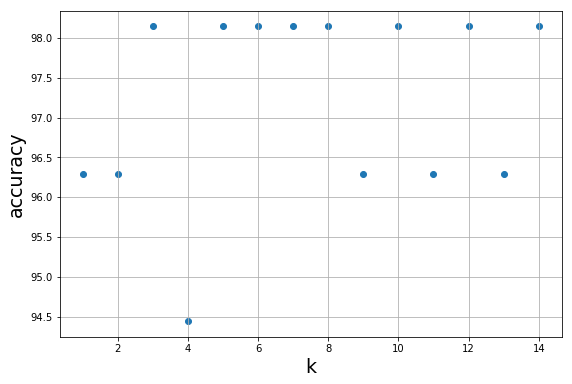

In [193]:
plt.scatter(x,accuracy)
plt.xlabel(r'k', fontsize=19)
plt.ylabel(r'accuracy', fontsize=19)
plt.grid()

In [194]:
max(accuracy)

98.14814814814815

#### 2)D(x,y) = $\sqrt{\sum\limits_{i=1}^n(x_i-y_i)^2}$-Евклидова метрика

In [195]:
k = 15
x = range(1,k)
accuracy = []
knn = []
for i in range (k-1):
    knn.append(KNeighborsClassifier(n_neighbors=x[i],p=2))
    knn[i].fit(X_train, y_train)
    knn_pred = knn[i].predict(X_valid)
    accuracy.append(accuracy_score(y_valid, knn_pred)*100)

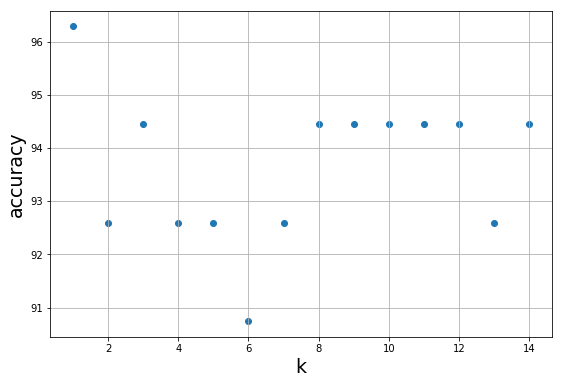

In [196]:
plt.scatter(x,accuracy)
plt.xlabel(r'k', fontsize=19)
plt.ylabel(r'accuracy', fontsize=19)
plt.grid()

In [197]:
max(accuracy)

96.29629629629629

#### 2)D(x,y) = $\sqrt[n]{\sum\limits_{i=1}^n(x_i-y_i)^n}$

In [198]:
k = 15
n=13
x = range(1,k)
accuracy = []
knn = []
for i in range (k-1):
    knn.append(KNeighborsClassifier(n_neighbors=x[i],p=n))
    knn[i].fit(X_train, y_train)
    knn_pred = knn[i].predict(X_valid)
    accuracy.append(accuracy_score(y_valid, knn_pred)*100)

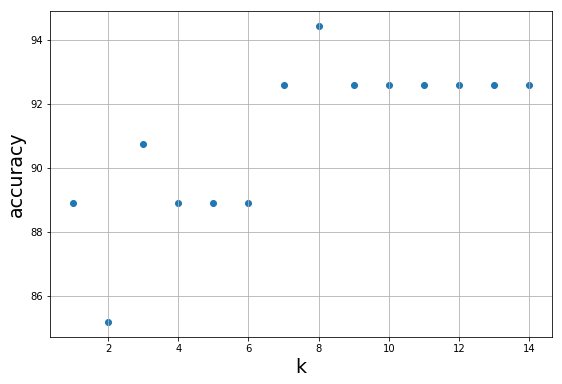

In [199]:
plt.scatter(x,accuracy)
plt.xlabel(r'k', fontsize=19)
plt.ylabel(r'accuracy', fontsize=19)
plt.grid()

In [200]:
max(accuracy)

94.44444444444444

### Построим зависимость ошибки(% неверных ответов) от числа признаков на обучении и контроле

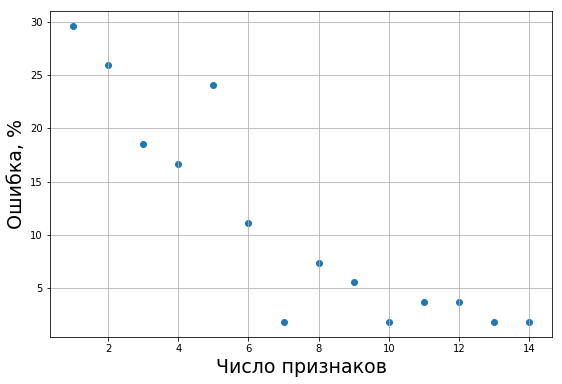

In [242]:
k = 14
errors = []
for i in range(14):
    knni = KNeighborsClassifier(n_neighbors=3,p=1)#как вы видели выше такие параметры дают хорошие результаты на
    knni.fit(X_train[:,0:i+1],y_train)            #контрольной выборке
    knn_pred = knni.predict(X_valid[:,0:i+1])
    errors.append((1-accuracy_score(y_valid, knn_pred))*100)

x = range(1,len(errors)+1)
plt.scatter(x,errors)
plt.xlabel(r'Число признаков', fontsize=19)
plt.ylabel(r'Ошибка, %', fontsize=19)
plt.grid()    
        
    

### Построим зависимость ошибки(% неверных ответов) от объёма данных на обучении и контроле

In [243]:
X_train.shape

(124, 13)

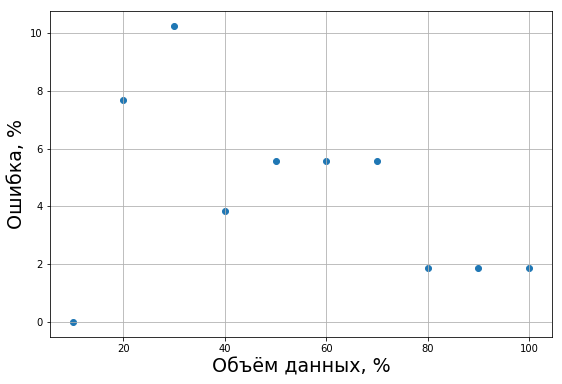

In [250]:
k = 10
errors = []
for i in range(k):
    knni = KNeighborsClassifier(n_neighbors=3,p=1)#как вы видели выше такие параметры дают хорошие результаты на
    knni.fit(X_train[:((i+1)*13),:],y_train[:(i+1)*13])            #контрольной выборке
    knn_pred = knni.predict(X_valid[:(i+1)*13,:])
    errors.append((1-accuracy_score(y_valid[:(i+1)*13], knn_pred))*100)

x = range(10,(len(errors)+1)*10,10)

plt.scatter(x,errors)
plt.xlabel(r'Объём данных, %', fontsize=19)
plt.ylabel(r'Ошибка, %', fontsize=19)
plt.grid()    
        